In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [78]:
#read the csv
resample = pd.read_csv('together.csv')
resample.head()

,x,y,GRID_CODE1-zoom,GRID_CODE-youtube,GRID_CODE-twitter,GRID_CODE-poi,GRID_CODE-flickr,GRID_CODE-email,GRID_CODE-company
0,2.225796,48.897312,2998363.25,0.0,83493.41,0.0,7007802.50,0.00,0.0
1,2.225988,48.897312,5904677.50,0.0,3243876.25,0.0,5708279.50,0.00,0.0
2,2.226180,48.897312,3986227.00,0.0,11488753.00,0.0,3047369.75,0.00,0.0
3,2.226372,48.897312,1017237.06,0.0,10204569.00,0.0,13899.71,0.00,0.0
4,2.226564,48.897312,4044450.00,0.0,1712450.75,0.0,0.00,79653.27,0.0


In [79]:
#Parameters
pp = resample[['GRID_CODE1-zoom','GRID_CODE-youtube','GRID_CODE-twitter','GRID_CODE-poi','GRID_CODE-flickr','GRID_CODE-email','GRID_CODE-company']]

In [80]:
#Extra parameters
pp2=resample[['x','y']]

In [81]:
#check for null values
pp.isnull().values.any()

False

In [82]:
#gives no of null values
pp.isnull().sum().sum()

0

<AxesSubplot:>

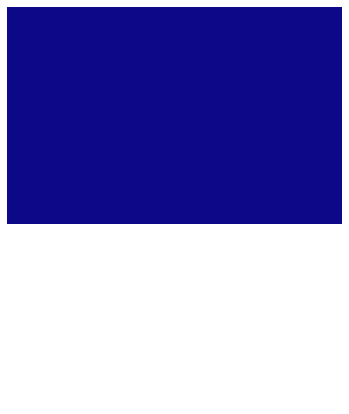

In [83]:
sns.heatmap(pp.isnull(),yticklabels=False,cbar=False,cmap='plasma')

In [84]:
#Beginning of PCA

from sklearn.preprocessing import StandardScaler

In [85]:
#scale, fit, transform
scaler = StandardScaler()  
scaler.fit(pp)
scaled_data=scaler.transform(pp)

In [86]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(scaled_data)  #we fit the scaled data (above)
x_pca = pca.transform(scaled_data)  #this projects all our data to the 3 components

In [87]:
scaled_data.shape

(9052, 7)

In [88]:
x_pca.shape

(9052, 5)

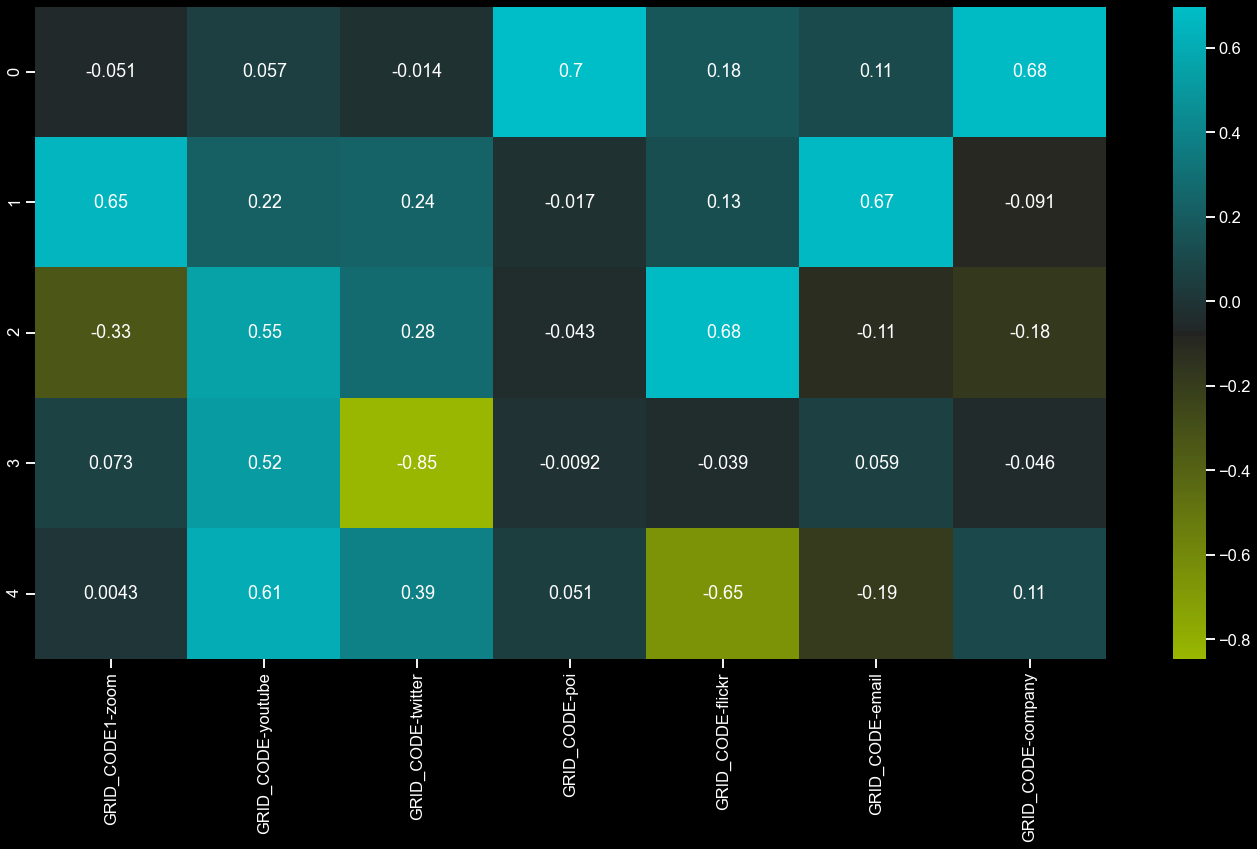

In [90]:
#Heatmap
sns.set(style="ticks", context="talk", font_scale=1, rc={"lines.linewidth": 1})
plt.style.use("dark_background")

pp_comp = pd.DataFrame(pca.components_, columns=pp.columns)
#ppnew = pp_comp.abs()
plt.figure(figsize=(24,12))

cmap = sns.diverging_palette(100,200, s=100,l=150,n=300, center="dark", as_cmap=True)
sns.heatmap(pp_comp, cmap=cmap, annot=True)
plt.savefig("PCA", dpi=300, bbox_inches = "tight")



###### pp.corr()

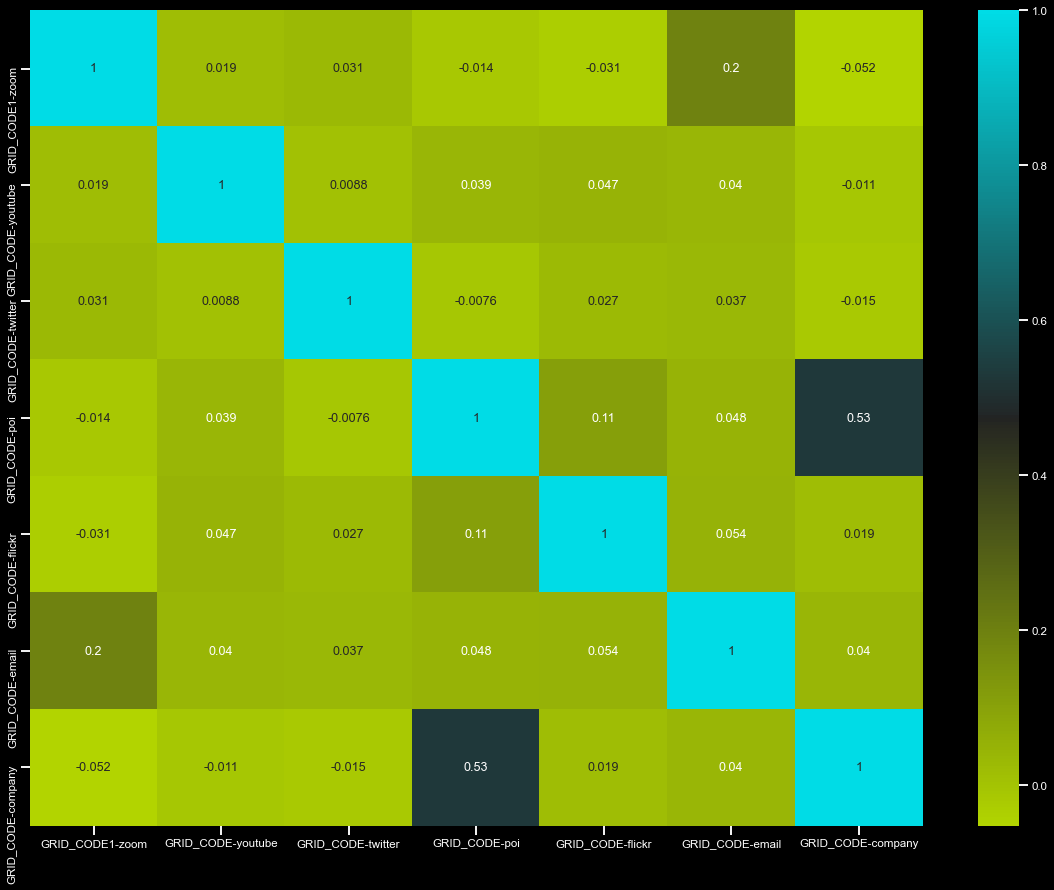

In [72]:
#Heatmap
sns.set(style="ticks", context="talk", font_scale=0.7, rc={"lines.linewidth": 1})
plt.style.use("dark_background")

plt.figure(figsize=(20,15))
heatmap= sns.heatmap(pp.corr(),cmap=cmap, annot=True)
plt.savefig("Correlation Heatmap", dpi=300, bbox_inches = "tight") #,transparent=True

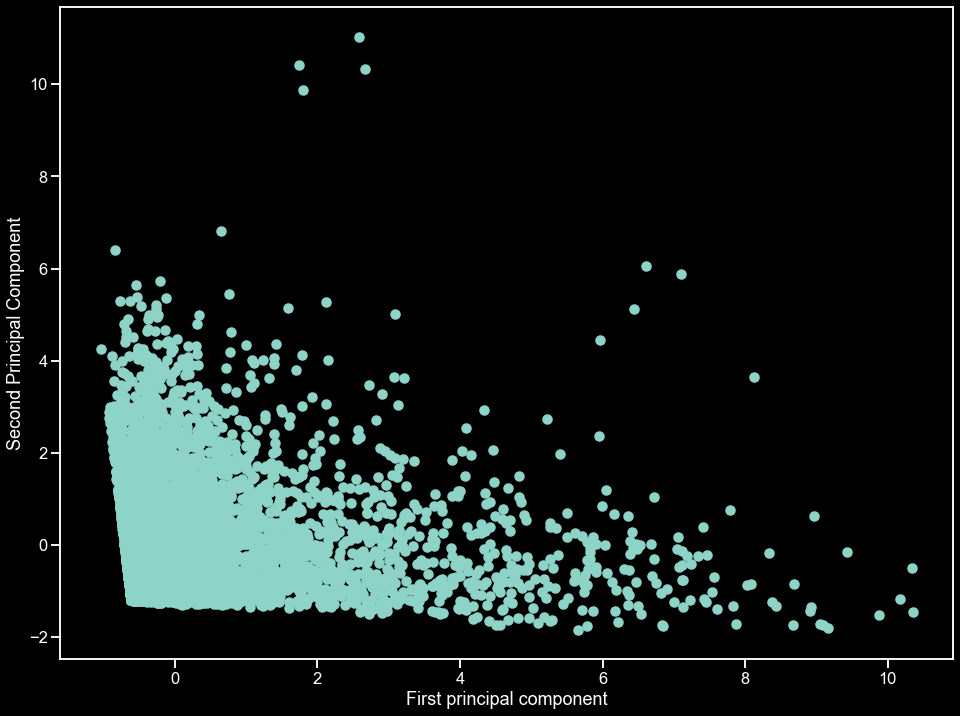

In [73]:
sns.set(style="ticks", context="talk", font_scale=1, rc={"lines.linewidth":0.1})
plt.style.use("dark_background")


plt.figure(figsize=(16,12))
plt.scatter(x_pca[:,0],x_pca[:,1],cmap='BuPu') #,c=resample['Crime']
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.savefig("PCA_graph", dpi=600)

### Simple pairplot with original data pp

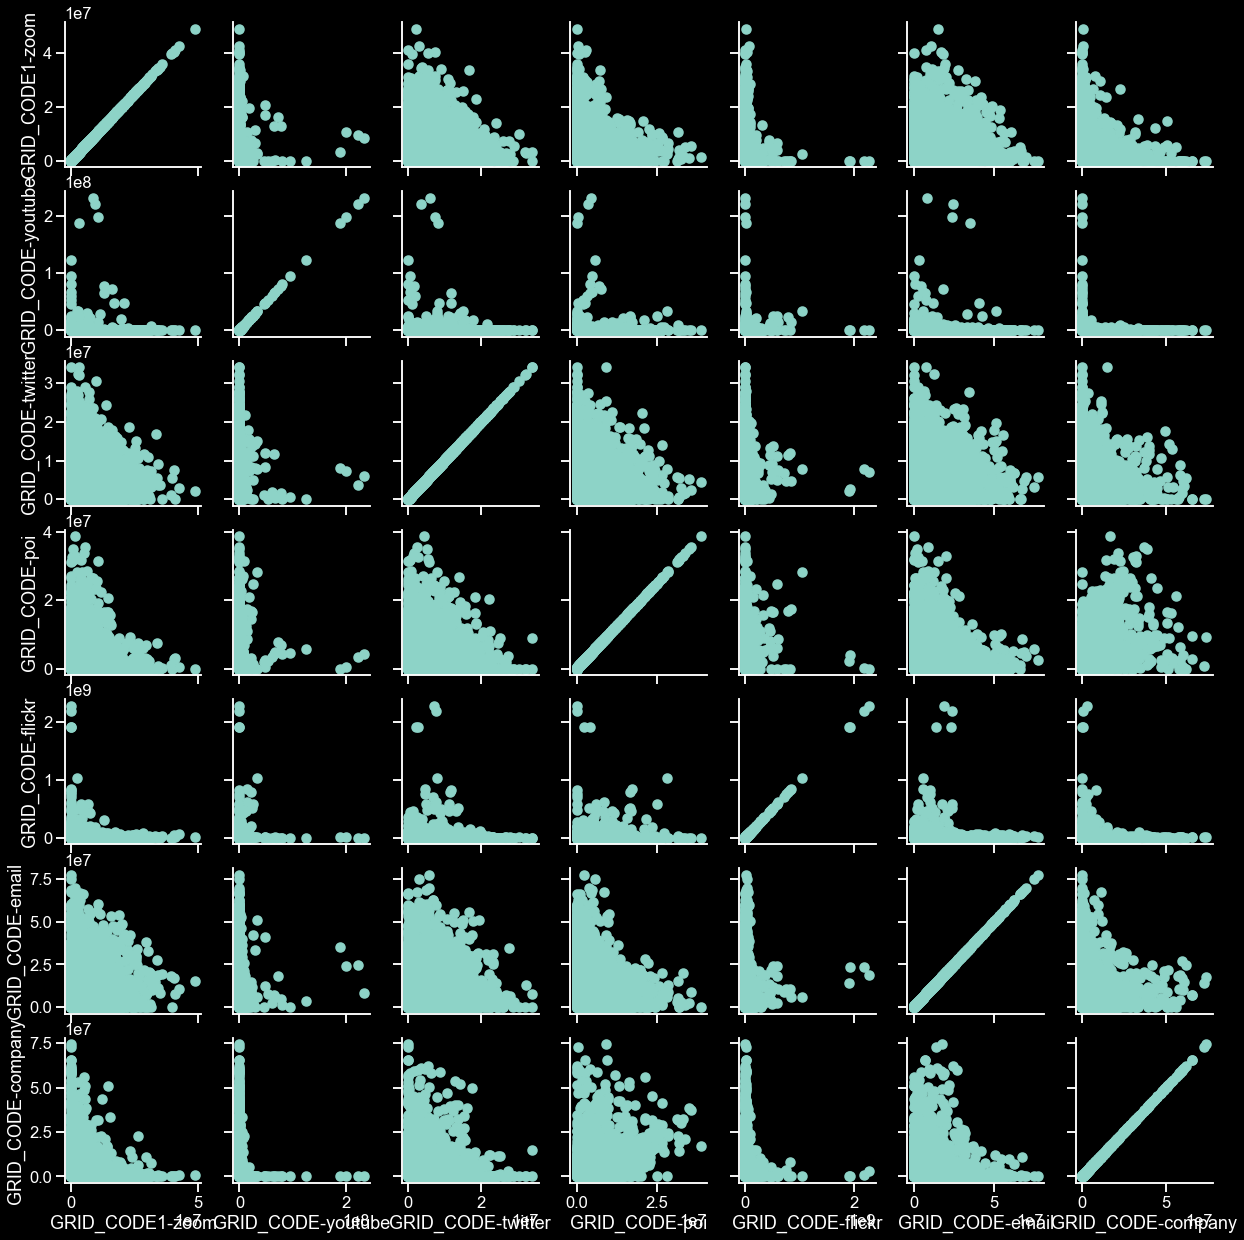

In [74]:
sns.set(style="ticks", context="talk", font_scale=1, rc={"lines.linewidth": 1})
plt.style.use("dark_background")

g = sns.PairGrid(pp)
g.map(plt.scatter)
plt.savefig("PairGrid", dpi=300, bbox_inches = "tight")

## K-Means Clustering

### 1. Define number of clusters using Elbow method

In [75]:
#Fit data and calculate sum of squares (WSS)
wss=[]
for i in range(1,12):
    from sklearn.cluster import KMeans
    kmeans_pca=KMeans(n_clusters=i,init="k-means++")
    kmeans_pca.fit(x_pca)
    wss.append(kmeans_pca.inertia_)

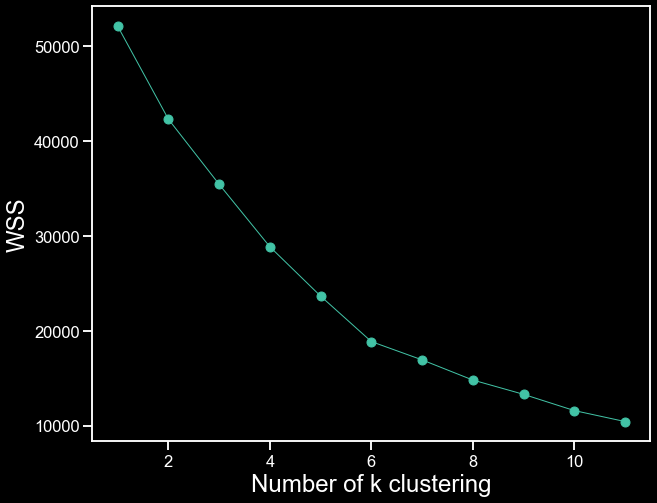

In [76]:
#Visualisation of k values in order to define the fittest

sns.set(style="ticks", context="talk", font_scale=1, rc={"lines.linewidth": 1})
plt.style.use("dark_background")
plt.figure(figsize=(10,8))
plt.plot(range(1,12),wss,marker="o", color='#42c3a6')
plt.xlabel("Number of k clustering", color='white', fontsize='24') #,fontstyle='italic'
plt.ylabel("WSS", color='white', fontsize='24') #,fontstyle='italic'
#plt.yscale("log")

plt.savefig("Elbow Plot", dpi=300, bbox_inches = "tight")

plt.show()

In [47]:
pwd


'C:\\Users\\MSI_NB'